In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [4]:
df = pd.read_csv('cleaned_training_setB.csv')
X = df.drop(['SepsisLabel', 'patient_id'], axis=1)
y = df['SepsisLabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=200)
ensemble = VotingClassifier(estimators=[('rf', rf), ('lr', lr)], voting='soft')
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('lr', LogisticRegression(max_iter=200))],
                 voting='soft')

In [8]:
from sklearn.metrics import accuracy_score
y_pred=ensemble.predict(X_test_scaled)
y_prob = ensemble.predict_proba(X_test_scaled)[:,1]
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print('Ensemble accuracy:', accuracy_score(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[[150242      1]
 [  2137     19]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    150243
           1       0.95      0.01      0.02      2156

    accuracy                           0.99    152399
   macro avg       0.97      0.50      0.51    152399
weighted avg       0.99      0.99      0.98    152399

ROC AUC: 0.9376377893045178
Ensemble accuracy: 0.985971036555358


In [12]:
import joblib
joblib.dump(ensemble, "ensemble_model.pkl")

['ensemble_model.pkl']

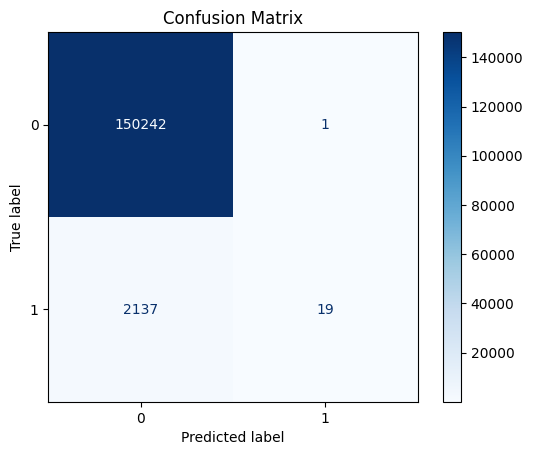

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ensemble.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

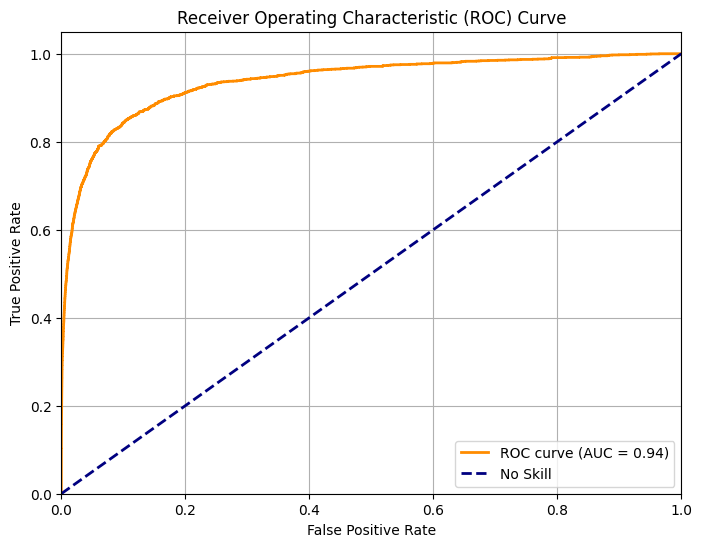

Calculated AUC: 0.94


In [10]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"Calculated AUC: {roc_auc:.2f}")